# Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumBarunGothic'

## 1. Explore Data

각 국가의 년도별 전체 인구 대비 도시 인구 점유율

In [3]:
df = pd.read_csv('data/ind_pop_data.csv')
df.head()

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
0,Afghanistan,AFG,1960,8990000.0,8.22
1,Afghanistan,AFG,1961,9160000.0,8.51
2,Afghanistan,AFG,1962,9340000.0,8.81
3,Afghanistan,AFG,1963,9530000.0,9.11
4,Afghanistan,AFG,1964,9730000.0,9.43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14612 entries, 0 to 14611
Data columns (total 5 columns):
CountryName      14612 non-null object
CountryCode      14612 non-null object
Year             14612 non-null int64
TotalPop         14612 non-null float64
UrbanPopRatio    14612 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 570.9+ KB


In [5]:
# 숫자형 데이터
df.describe()

,Year,TotalPop,UrbanPopRatio
count,14612.000000,1.461200e+04,14612.000000
mean,1987.492883,2.033594e+08,48.429783
std,16.160258,6.684231e+08,25.236047
min,1960.000000,0.000000e+00,0.000000
25%,1973.000000,8.495000e+05,28.000000
50%,1987.000000,6.130000e+06,46.400000
75%,2001.000000,4.140000e+07,68.100000
max,2015.000000,7.350000e+09,100.000000


In [6]:
# 범주형 데이터
df['CountryName'].value_counts(dropna=False).head()

Qatar                             56
Honduras                          56
Indonesia                         56
St. Vincent and the Grenadines    56
Bangladesh                        56
Name: CountryName, dtype: int64

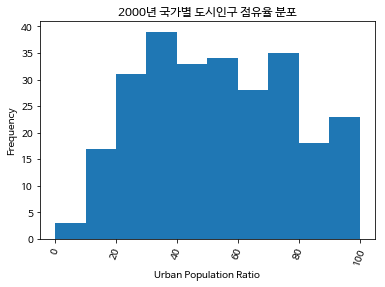

In [39]:
# 2000년 도시인구 점유율
df2000 = df[df.Year == 2000]
df2000['UrbanPopRatio'].plot(kind='hist', rot=70)
plt.xlabel('Urban Population Ratio')
plt.title('2000년 국가별 도시인구 점유율 분포')

In [31]:
df2000_up90 = df2000[df2000.UrbanPopRatio >= 90]
df2000_up90

,CountryName,CountryCode,Year,TotalPop,UrbanPopRatio
264,Andorra,ADO,2000,65400.0,92.4
1104,Belgium,BEL,2000,10300000.0,97.1
1272,Bermuda,BMU,2000,61800.0,100.0
2168,Cayman Islands,CYM,2000,41700.0,100.0
3008,Curacao,CUW,2000,134000.0,90.8
4908,Gibraltar,GIB,2000,27400.0,100.0
5132,Guam,GUM,2000,155000.0,93.1
5636,"Hong Kong SAR, China",HKG,2000,6670000.0,100.0
5804,Iceland,ISL,2000,281000.0,92.4
6420,Israel,ISR,2000,6290000.0,91.2


* 2000년에 전체 인구 대비 90% 이상이 도시 지역에 밀집해 있는 국가들이 상당수 있다.
* 도시인구비율이 100%인 국가들은 작은 섬나라 또는 싱가폴, 홍콩 같은 작은 영토 국가임을 알 수 있다.

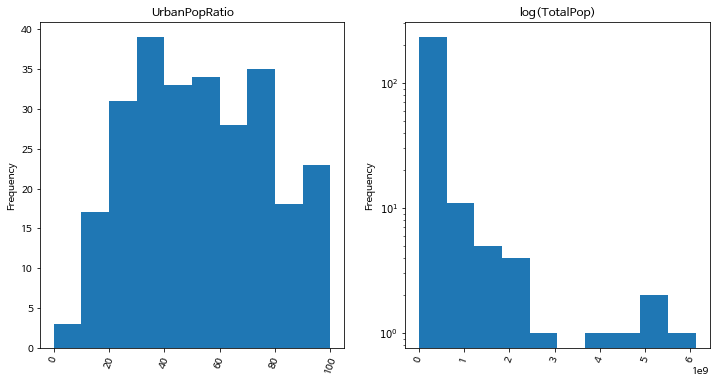

In [40]:
# subplot(mnx) : m 행 n 열의 x 번째
plt.figure(figsize=(12,6))
plt.subplot(121)
df2000['UrbanPopRatio'].plot(kind='hist', rot=70)
plt.title('UrbanPopRatio')
plt.subplot(122)
df2000['TotalPop'].plot(kind='hist', rot=70, logy=True)
plt.title('log(TotalPop)')

In [34]:
# boxplot
# 한국, 일본, 중국, 인도의 1960 - 2015년 도시인구 점유율 비교

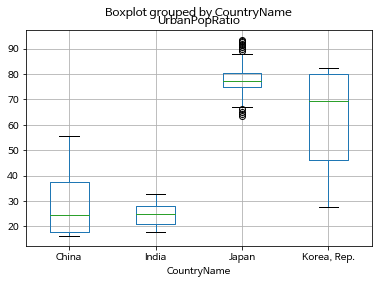

In [54]:
df_4nation = df[df['CountryCode'].isin(['KOR','JPN','CHN','IND'])]
df_4nation.boxplot(column='UrbanPopRatio', by='CountryName')

* 중국과 인도는 인구가 도시에 밀접한 비율이 대체로 50% 이하이다.
* 일본은 1960년대부터 이미 도시 인구가 전체 인구의 60% 이상이었다. 도시중심의 생활권 형성.
* 한국은 도시인구의 점유율 폭이 상대적으로 매우 넓다. 초기에는 도시인구가 많지 않았으나 점차 증가하면서 80%를 넘기도 했다.

In [49]:
# 도시인구 점유율 변화 추세

In [69]:
df_k = df[df['CountryCode'] == 'KOR']
df_j = df[df['CountryCode'] == 'JPN']
df_c = df[df['CountryCode'] == 'CHN']
df_i = df[df['CountryCode'] == 'IND']

df_4na = pd.DataFrame()
df_4na['Year'] = pd.Series(list(df_k['Year']))
df_4na['Korea'] = pd.Series(list(df_k['UrbanPopRatio']))
df_4na['Japan'] = pd.Series(list(df_j['UrbanPopRatio']))
df_4na['China'] = pd.Series(list(df_c['UrbanPopRatio']))
df_4na['India'] = pd.Series(list(df_i['UrbanPopRatio']))
df_4na.head()

,Year,Korea,Japan,China,India
0,1960,27.7,63.3,16.2,17.9
1,1961,28.5,64.2,16.7,18.0
2,1962,29.5,65.1,17.2,18.2
3,1963,30.4,66.1,17.8,18.4
4,1964,31.4,67.0,18.3,18.6


In [70]:
df_4na.shape

(56, 5)

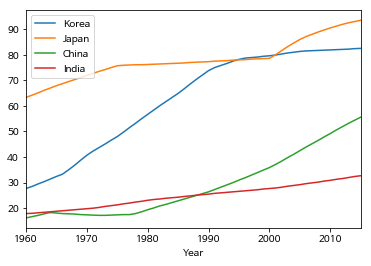

In [73]:
df_4na.plot(x = 'Year')

In [74]:
# scatter plot

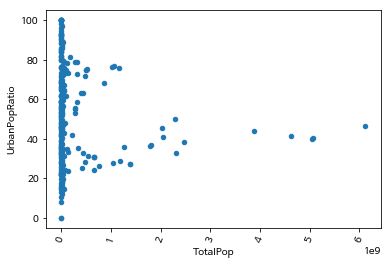

In [47]:
df2000.plot(kind='scatter', x='TotalPop', y='UrbanPopRatio', rot=70)

## 2. Tidying data

In [77]:
df_air = pd.read_csv('data/airquality.csv')
df_air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### melt 를 사용하여 데이터의 행과 열을 정리

In [78]:
df_melt = pd.melt(df_air, id_vars=['Month', 'Day'])
df_melt.head()

,Month,Day,variable,value
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


In [79]:
# 컬럼명 지정
df_melt = pd.melt(df_air, id_vars=['Month', 'Day'], var_name='measurement', value_name='reading')
df_melt.head()

,Month,Day,measurement,reading
0,5,1,Ozone,41.0
1,5,2,Ozone,36.0
2,5,3,Ozone,12.0
3,5,4,Ozone,18.0
4,5,5,Ozone,NaN


In [83]:
# Pivot
df_pivot = df_melt.pivot_table(index=['Month', 'Day'], columns='measurement', values='reading')
df_pivot.head()

measurement  Ozone  Solar.R  Temp  Wind
Month Day                              
5     1       41.0    190.0  67.0   7.4
      2       36.0    118.0  72.0   8.0
      3       12.0    149.0  74.0  12.6
      4       18.0    313.0  62.0  11.5
      5        NaN      NaN  56.0  14.3

In [81]:
# reset index - 원래의 데이터 형태로 되돌아감.
df_pivot = df_pivot.reset_index()
df_pivot.head()

measurement,Month,Day,Ozone,Solar.R,Temp,Wind
0,5,1,41.0,190.0,67.0,7.4
1,5,2,36.0,118.0,72.0,8.0
2,5,3,12.0,149.0,74.0,12.6
3,5,4,18.0,313.0,62.0,11.5
4,5,5,NaN,NaN,56.0,14.3
